## Decision Tree 直观理解

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from algorithm.plot_decision_boundary import plot_decision_boundary

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

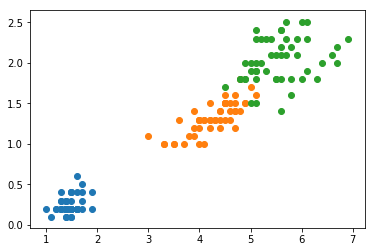

In [3]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

In [4]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2, criterion='entropy', random_state=42)
dt_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

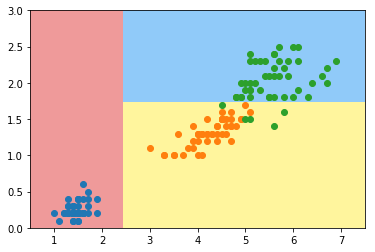

In [5]:
plot_decision_boundary(dt_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

### Entropy (二分类)

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def entropy(p):
    return -p * np.log(p) - (1-p) * np.log(1-p)

In [8]:
x = np.linspace(0.01, 0.99, 200)

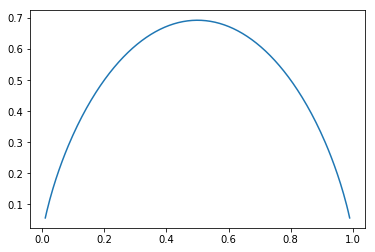

In [9]:
# 在K均分类时，信息熵达到最大值log(k)
plt.plot(x, entropy(x))
plt.show()

## 使用信息熵寻找最优划分

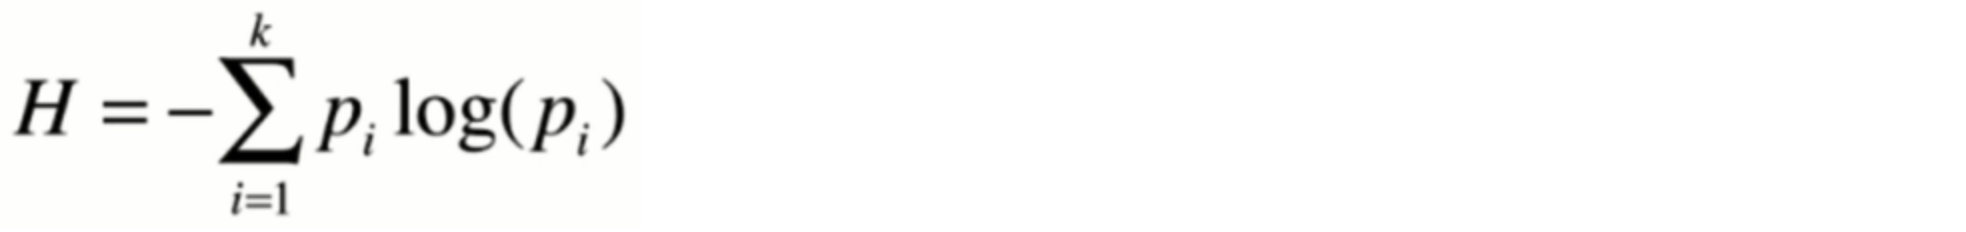

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from algorithm.plot_decision_boundary import plot_decision_boundary

In [11]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

In [12]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2, criterion='entropy')
dt_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

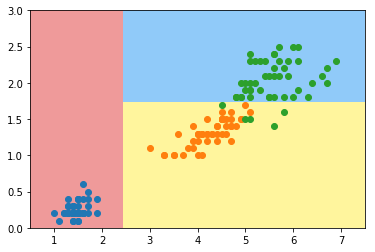

In [13]:
plot_decision_boundary(dt_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

###  模拟使用信息熵进行划分

In [14]:
def split(X, y, d, value):
    index_a = (X[:,d] <= value)
    index_b = (X[:,d] > value)
    return X[index_a], X[index_b], y[index_a], y[index_b]

In [36]:
from collections import Counter
from math import log

def entropy(y):
    counter = Counter(y)   # y的键值对 label：count
    res = 0.0
    for num in counter.values():
        p = num / len(y)
        res += -p * log(p)
    return res
        
def try_split_entropy(X, y):
    
    best_entropy = float('inf')
    best_d, best_v = -1, 1
    for d in range(X.shape[1]):
        sorted_index = np.argsort(X[:, d])
        for i in range(1, len(X)):
            if X[sorted_index[i-1], d] != X[sorted_index[i], d]:
                v = (X[sorted_index[i-1], d] + X[sorted_index[i], d]) / 2
                X_l, X_r, y_l, y_r = split(X, y, d, v)
                p_l, p_r = len(X_l) / len(X), len(X_r) / len(X)
                e = p_l * entropy(y_l) + p_r * entropy(y_r)
                if e < best_entropy:
                    best_entropy, best_d, best_v = e, d, v
                    
    return best_entropy, best_d, best_v

In [37]:
best_entropy, best_d, best_v = try_split_entropy(X, y)
print("best_entropy =", best_entropy)
print("best_d =", best_d)
print("best_v =", best_v)

best_entropy = 0.46209812037329684
best_d = 0
best_v = 2.45


In [22]:
X1_l, X1_r, y1_l, y1_r = split(X, y, best_d, best_v)
X1_l, X1_r, y1_l, y1_r

(array([[1.4, 0.2],
        [1.4, 0.2],
        [1.3, 0.2],
        [1.5, 0.2],
        [1.4, 0.2],
        [1.7, 0.4],
        [1.4, 0.3],
        [1.5, 0.2],
        [1.4, 0.2],
        [1.5, 0.1],
        [1.5, 0.2],
        [1.6, 0.2],
        [1.4, 0.1],
        [1.1, 0.1],
        [1.2, 0.2],
        [1.5, 0.4],
        [1.3, 0.4],
        [1.4, 0.3],
        [1.7, 0.3],
        [1.5, 0.3],
        [1.7, 0.2],
        [1.5, 0.4],
        [1. , 0.2],
        [1.7, 0.5],
        [1.9, 0.2],
        [1.6, 0.2],
        [1.6, 0.4],
        [1.5, 0.2],
        [1.4, 0.2],
        [1.6, 0.2],
        [1.6, 0.2],
        [1.5, 0.4],
        [1.5, 0.1],
        [1.4, 0.2],
        [1.5, 0.2],
        [1.2, 0.2],
        [1.3, 0.2],
        [1.4, 0.1],
        [1.3, 0.2],
        [1.5, 0.2],
        [1.3, 0.3],
        [1.3, 0.3],
        [1.3, 0.2],
        [1.6, 0.6],
        [1.9, 0.4],
        [1.4, 0.3],
        [1.6, 0.2],
        [1.4, 0.2],
        [1.5, 0.2],
        [1.4, 0.2]])

In [23]:
entropy(y1_l), entropy(y1_r)

(0.0, 0.6931471805599453)

In [24]:
Counter(y1_r)

Counter({1: 50, 2: 50})

In [38]:
best_entropy2, best_d2, best_v2 = try_split_entropy(X1_r, y1_r)
print("best_entropy2 =", best_entropy2)
print("best_d2 =", best_d2)
print("best_v2 =", best_v2)

best_entropy2 = 0.2147644654371359
best_d2 = 1
best_v2 = 1.75


In [39]:
X2_l, X2_r, y2_l, y2_r = split(X1_r, y1_r, best_d2, best_v2)
X2_l, X2_r, y2_l, y2_r

(array([[4.7, 1.4],
        [4.5, 1.5],
        [4.9, 1.5],
        [4. , 1.3],
        [4.6, 1.5],
        [4.5, 1.3],
        [4.7, 1.6],
        [3.3, 1. ],
        [4.6, 1.3],
        [3.9, 1.4],
        [3.5, 1. ],
        [4.2, 1.5],
        [4. , 1. ],
        [4.7, 1.4],
        [3.6, 1.3],
        [4.4, 1.4],
        [4.5, 1.5],
        [4.1, 1. ],
        [4.5, 1.5],
        [3.9, 1.1],
        [4. , 1.3],
        [4.9, 1.5],
        [4.7, 1.2],
        [4.3, 1.3],
        [4.4, 1.4],
        [4.8, 1.4],
        [5. , 1.7],
        [4.5, 1.5],
        [3.5, 1. ],
        [3.8, 1.1],
        [3.7, 1. ],
        [3.9, 1.2],
        [5.1, 1.6],
        [4.5, 1.5],
        [4.5, 1.6],
        [4.7, 1.5],
        [4.4, 1.3],
        [4.1, 1.3],
        [4. , 1.3],
        [4.4, 1.2],
        [4.6, 1.4],
        [4. , 1.2],
        [3.3, 1. ],
        [4.2, 1.3],
        [4.2, 1.2],
        [4.2, 1.3],
        [4.3, 1.3],
        [3. , 1.1],
        [4.1, 1.3],
        [4.5, 1.7],


In [40]:
entropy(y2_l), entropy(y2_r)

(0.30849545083110386, 0.10473243910508653)

In [41]:
Counter(y2_l), Counter(y2_r)

(Counter({1: 49, 2: 5}), Counter({1: 1, 2: 45}))

## 使用基尼系数度量数据集的无序程度

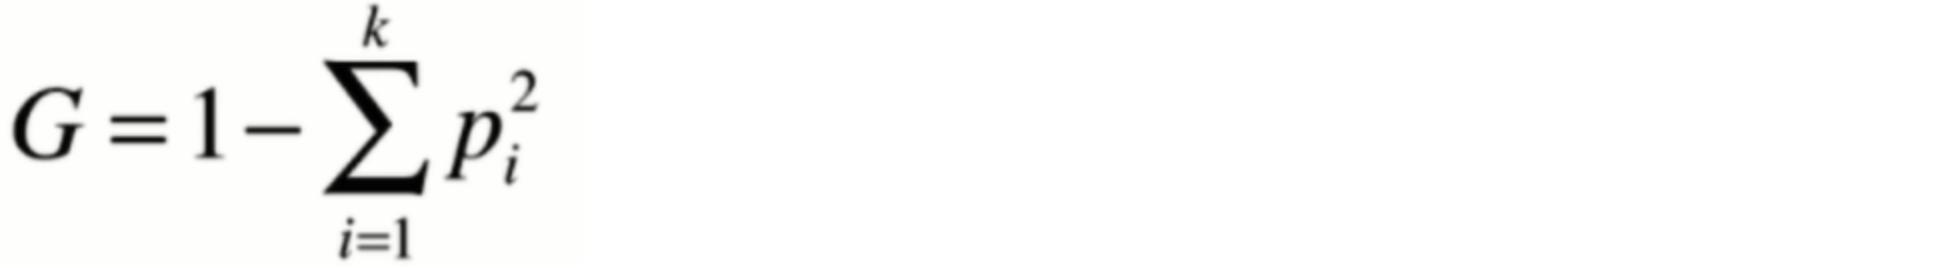

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from algorithm.plot_decision_boundary import plot_decision_boundary

In [31]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

In [32]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2, criterion='gini')
dt_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

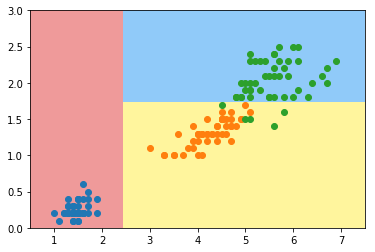

In [34]:
plot_decision_boundary(dt_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

### 模拟使用基尼系数进行划分

In [47]:
from collections import Counter
from math import log

def split(X, y, d, value):
    index_a = (X[:,d] <= value)
    index_b = (X[:,d] > value)
    return X[index_a], X[index_b], y[index_a], y[index_b]

def gini(y):
    counter = Counter(y)   # y的键值对 label：count
    res = 1.0
    for num in counter.values():
        p = num / len(y)
        res -= p**2
    return res
        
def try_split_gini(X, y):
    
    best_gini = 1.0
    best_d, best_v = -1, 1
    for d in range(X.shape[1]):
        sorted_index = np.argsort(X[:, d])
        for i in range(1, len(X)):
            if X[sorted_index[i-1], d] != X[sorted_index[i], d]:
                v = (X[sorted_index[i-1], d] + X[sorted_index[i], d]) / 2
                X_l, X_r, y_l, y_r = split(X, y, d, v)
                p_l, p_r = len(X_l) / len(X), len(X_r) / len(X)
                g = p_l * gini(y_l) + p_r * gini(y_r)
                if g < best_gini:
                    best_gini, best_d, best_v = g, d, v
                    
    return best_gini, best_d, best_v

In [50]:
best_gini, best_d, best_v = try_split_gini(X, y)
print("best_gini =", best_gini)
print("best_d =", best_d)
print("best_v =", best_v)

best_gini = 0.3333333333333333
best_d = 0
best_v = 2.45


In [51]:
X1_l, X1_r, y1_l, y1_r = split(X, y, best_d, best_v)
X1_l, X1_r, y1_l, y1_r

(array([[1.4, 0.2],
        [1.4, 0.2],
        [1.3, 0.2],
        [1.5, 0.2],
        [1.4, 0.2],
        [1.7, 0.4],
        [1.4, 0.3],
        [1.5, 0.2],
        [1.4, 0.2],
        [1.5, 0.1],
        [1.5, 0.2],
        [1.6, 0.2],
        [1.4, 0.1],
        [1.1, 0.1],
        [1.2, 0.2],
        [1.5, 0.4],
        [1.3, 0.4],
        [1.4, 0.3],
        [1.7, 0.3],
        [1.5, 0.3],
        [1.7, 0.2],
        [1.5, 0.4],
        [1. , 0.2],
        [1.7, 0.5],
        [1.9, 0.2],
        [1.6, 0.2],
        [1.6, 0.4],
        [1.5, 0.2],
        [1.4, 0.2],
        [1.6, 0.2],
        [1.6, 0.2],
        [1.5, 0.4],
        [1.5, 0.1],
        [1.4, 0.2],
        [1.5, 0.2],
        [1.2, 0.2],
        [1.3, 0.2],
        [1.4, 0.1],
        [1.3, 0.2],
        [1.5, 0.2],
        [1.3, 0.3],
        [1.3, 0.3],
        [1.3, 0.2],
        [1.6, 0.6],
        [1.9, 0.4],
        [1.4, 0.3],
        [1.6, 0.2],
        [1.4, 0.2],
        [1.5, 0.2],
        [1.4, 0.2]])

In [53]:
gini(y1_l), gini(y1_r)

(0.0, 0.5)

In [55]:
best_gini2, best_d2, best_v2 = try_split_gini(X1_r, y1_r)
print("best_gini2 =", best_gini2)
print("best_d2 =", best_d2)
print("best_v2 =", best_v2)

best_gini2 = 0.1103059581320451
best_d2 = 1
best_v2 = 1.75


In [56]:
X2_l, X2_r, y2_l, y2_r = split(X1_r, y1_r, best_d2, best_v2)

In [57]:
gini(y2_l), gini(y2_r)

(0.1680384087791495, 0.04253308128544431)

## CART 和 决策树的超参数

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from algorithm.plot_decision_boundary import plot_decision_boundary

In [59]:
from sklearn import datasets

X, y = datasets.make_moons(noise=0.25, random_state=666)

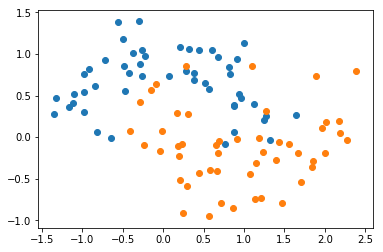

In [64]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

### 解决分类问题  DecisionTreeClassifier

In [68]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()   # 默认gini，直到纯二分类为止
dt_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

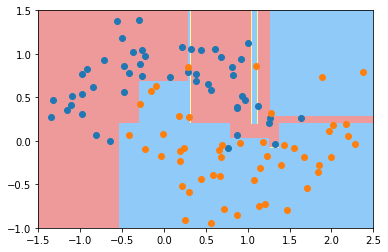

In [71]:
# 形状太复杂，典型的过拟合
plot_decision_boundary(dt_clf, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

#### 调整不同的参数剪枝，防止过拟合

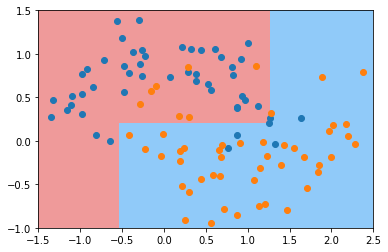

In [72]:
dt_clf2 = DecisionTreeClassifier(max_depth=2)   #调整决策树深度为2
dt_clf2.fit(X, y)

plot_decision_boundary(dt_clf2, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

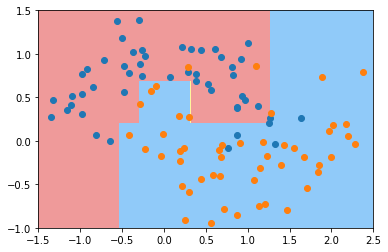

In [74]:
dt_clf3 = DecisionTreeClassifier(min_samples_split=10)  #设置最小划分的样本数，如果低于这个数，将不再进一步划分
dt_clf3.fit(X, y)

plot_decision_boundary(dt_clf3, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

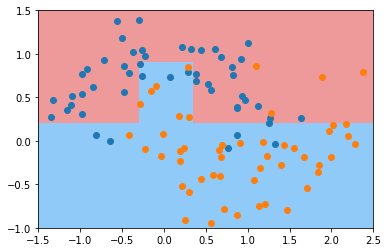

In [75]:
dt_clf4 = DecisionTreeClassifier(min_samples_leaf=6)  #设置叶子结点最小样本数，如果低于这个数，将不再进一步划分
dt_clf4.fit(X, y)

plot_decision_boundary(dt_clf4, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

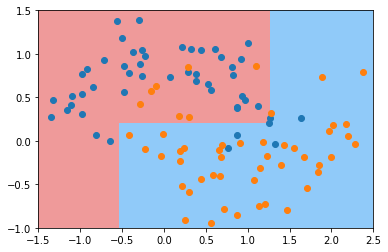

In [76]:
dt_clf5 = DecisionTreeClassifier(max_leaf_nodes=4)   #最多有4个叶子节点（防止树过深）
dt_clf5.fit(X, y)

plot_decision_boundary(dt_clf5, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

### 解决回归问题  DecisionTreeRegressor

In [90]:
import numpy as np
import matplotlib.pyplot as plt

In [91]:
from sklearn import datasets

boston = datasets.load_boston()
X = boston.data
y = boston.target

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [97]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()  # 参数与Classifier一致，区别在于返回值为 label 还是 y_means
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [94]:
dt_reg.score(X_test, y_test)

0.6800508000220323

In [98]:
dt_reg.score(X_train, y_train)  #数据在训练数据中毫无偏差，在测试集中表现不佳，明显出现了过拟合，需要进行调参

1.0

In [112]:
dt_reg2 = DecisionTreeRegressor(min_samples_split=10)  
dt_reg2.fit(X_train, y_train)
dt_reg2.score(X_test, y_test), dt_reg2.score(X_train, y_train)  

(0.6986810946545676, 0.9767350541980317)

In [116]:
dt_reg3 = DecisionTreeRegressor(min_samples_leaf=10)  
dt_reg3.fit(X_train, y_train)
dt_reg3.score(X_test, y_test), dt_reg3.score(X_train, y_train)  

(0.7001266652503475, 0.8790135286603777)

In [128]:
dt_reg4 = DecisionTreeRegressor(max_leaf_nodes=10)  
dt_reg4.fit(X_train, y_train)
dt_reg4.score(X_test, y_test), dt_reg4.score(X_train, y_train)  

(0.7299789136358712, 0.8775647463267381)